In [ ]:
# ARIMA MODEL IMPLEMENTATION
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00


In [ ]:
# Define the path to your CSV file on Google Drive
csv_path = '/content/drive/My Drive/DETD_2023_/Datasets/Dataset1_kaggle/continuous_dataset.csv'

# Load Data
data = pd.read_csv(csv_path)
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M')
data.set_index('datetime', inplace=True)
data


,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64


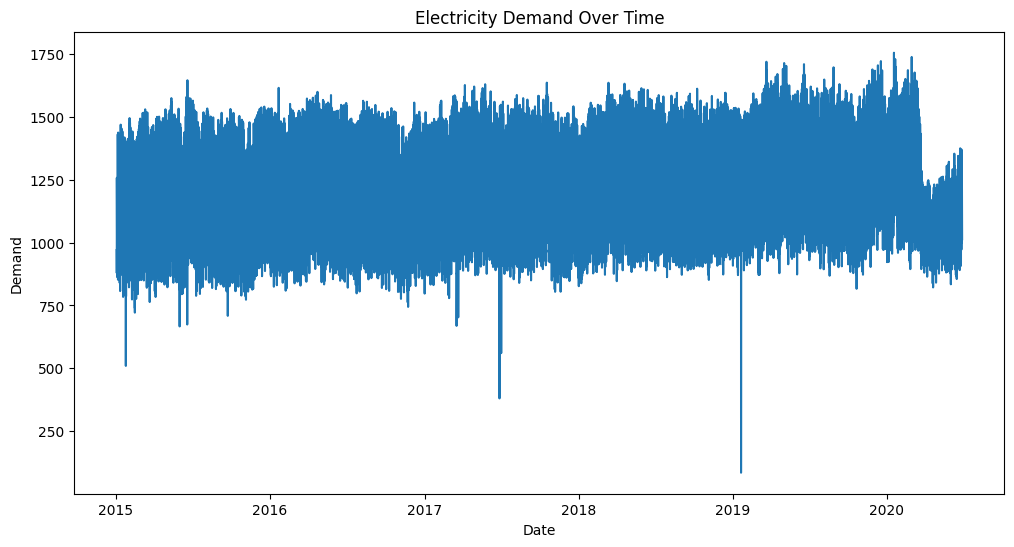

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data['nat_demand'])
plt.title('Electricity Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()


In [ ]:
import pandas as pd
# Define the columns you want to analyze for outliers
columns_to_check = ['nat_demand']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outliers = pd.DataFrame()

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers and store them in the 'outliers' DataFrame
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

    return outliers

# Detect outliers
outliers = detect_outliers_iqr(data, columns_to_check)
print(outliers)
# Remove outliers from the original dataset
cleaned_data = data[~data.index.isin(outliers.index)]

# Print or save the cleaned dataset
print(cleaned_data)

                     nat_demand
datetime                       
2015-01-24 17:00:00    509.8358
2017-06-27 12:00:00    380.5936
2019-01-20 12:00:00     85.1925
2019-01-20 13:00:00    135.7636
2019-01-20 14:00:00    263.6183
2019-01-20 15:00:00    417.4492
2019-01-20 16:00:00    475.8024
                     nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
datetime                                                                    
2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174  21.850546   
2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418  22.166944   
2015-01-03 03:00:00    900.2688  25.937280  0.018768  0.015480  22.454911   
2015-01-03 04:00:00    889.9538  25.957544  0.018890  0.016273  22.110481   
2015-01-03 05:00:00    893.6865  25.973840  0.018981  0.017281  21.186089   
...                         ...        ...       ...       ...        ...   
2020-06-26 20:00:00   1128.5592  27.246545  0.020303  0.055511   9.289304   
2020-06-26 21:00:00

In [ ]:
data=cleaned_data
 # Forward fill missing values

# Introduce New Points (e.g., Upsample to hourly frequency)
new_index = pd.date_range(data.index.min(), data.index.max(), freq='H')
data = data.reindex(new_index)

# Data Cleaning (Imputation)
data.fillna(method='ffill', inplace=True)
# Smoothing (e.g., 7-day moving average)
# data['nat_demand'] = data['nat_demand'].rolling(window=7).mean()

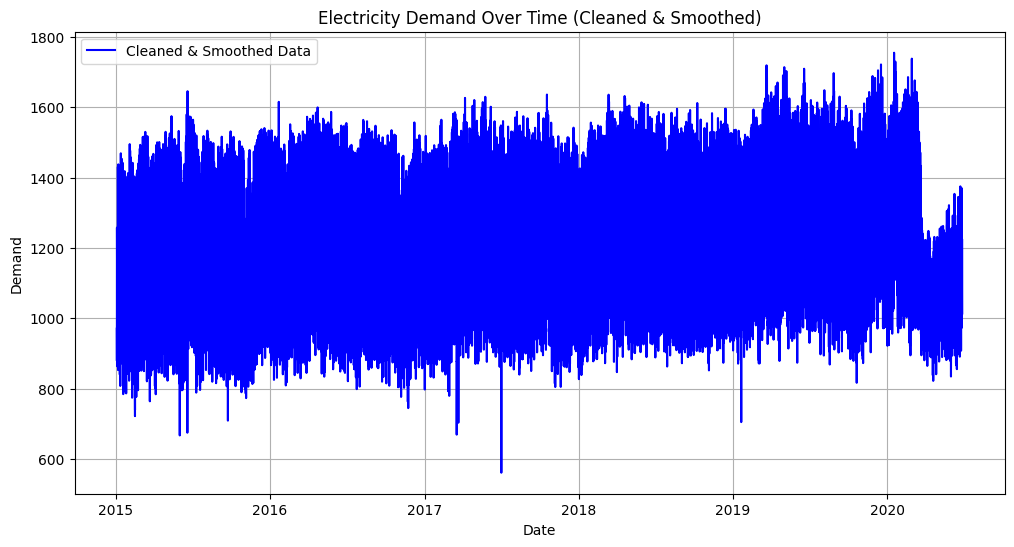

In [ ]:
import matplotlib.pyplot as plt

# Plot the cleaned, smoothed, and resampled time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['nat_demand'], label='Cleaned & Smoothed Data', color='blue')
plt.title('Electricity Demand Over Time (Cleaned & Smoothed)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


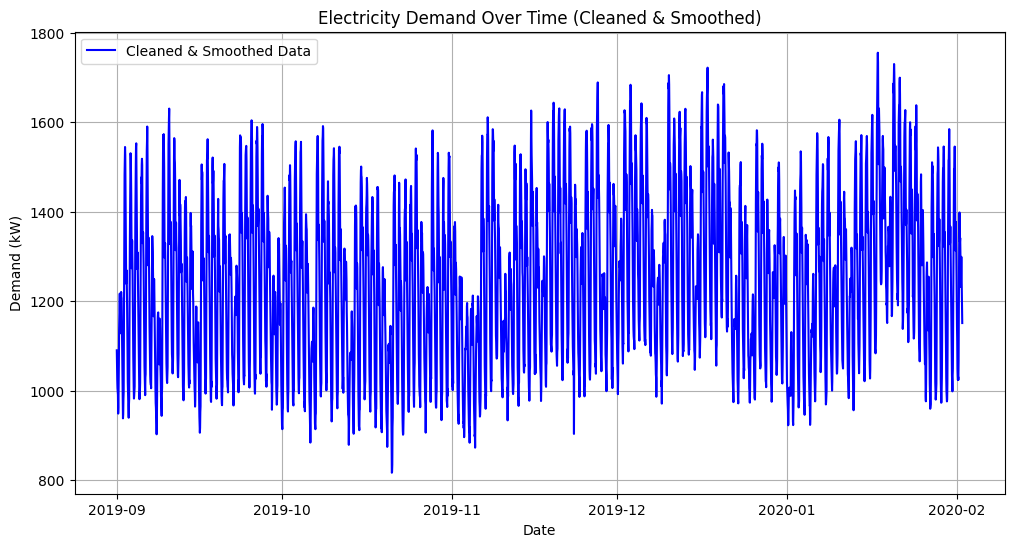

In [ ]:
import matplotlib.pyplot as plt

# Define the date range you want to display
start_date = '2019-09-01'
end_date = '2020-02-01'

# Extract the subset of data within the specified date range
subset_data = data[start_date:end_date]

# Plot the subset of data
plt.figure(figsize=(12, 6))
plt.plot(subset_data.index, subset_data['nat_demand'], label='Cleaned & Smoothed Data', color='blue')
plt.title('Electricity Demand Over Time (Cleaned & Smoothed)')
plt.xlabel('Date')
plt.ylabel('Demand (kW)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# data.fillna(method='ffill', inplace=True)
# Count the number of NaN and infinite values
nan_count = data.isna().sum().sum()
inf_count = np.isinf(data).sum().sum()

print("Number of NaN values:", nan_count)
print("Number of infinite values:", inf_count)


Number of NaN values: 0
Number of infinite values: 0


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

adf_test(data['nat_demand'])


ADF Statistic: -21.012018894533995
p-value: 0.0
Critical Values: {'1%': -3.430486271094305, '5%': -2.861600228969454, '10%': -2.5668020578981667}


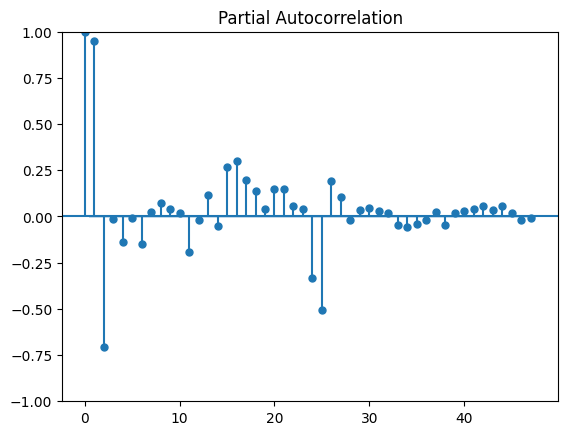

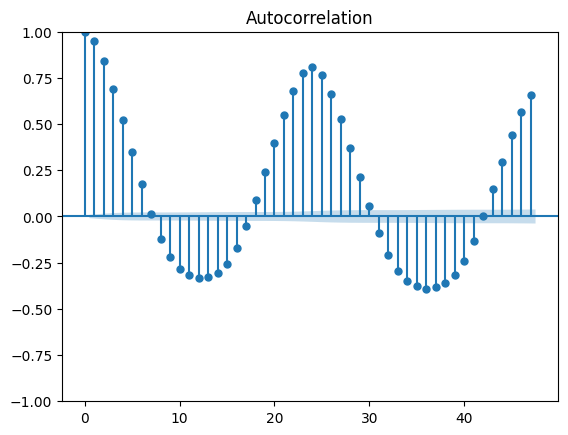

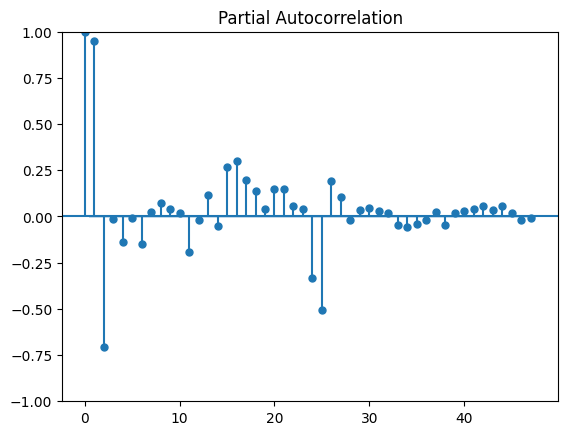

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['nat_demand'])
plot_pacf(data['nat_demand'])


In [ ]:
# p =  # AR parameter
# d =  0 # Differencing order
# q =  # MA parameter

# model = ARIMA(data['nat_demand'], order=(p, d, q))
# results = model.fit()


In [ ]:
train_size = int(0.99998 * len(data))  # Adjust the split ratio as needed
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]
print(test_data.count())
print(test_data)

nat_demand    1
T2M_toc       1
QV2M_toc      1
TQL_toc       1
W2M_toc       1
T2M_san       1
QV2M_san      1
TQL_san       1
W2M_san       1
T2M_dav       1
QV2M_dav      1
TQL_dav       1
W2M_dav       1
Holiday_ID    1
holiday       1
school        1
dtype: int64
            nat_demand   T2M_toc  QV2M_toc   TQL_toc    W2M_toc   T2M_san  \
2020-06-27   1013.5683  26.75033  0.020441  0.063965  10.198346  25.12533   

            QV2M_san   TQL_san   W2M_san   T2M_dav  QV2M_dav   TQL_dav  \
2020-06-27  0.019281  0.100189  2.785751  23.56283  0.018404  0.162598   

             W2M_dav  Holiday_ID  holiday  school  
2020-06-27  3.286878         0.0      0.0     1.0  


In [ ]:
from pmdarima import auto_arima

model = auto_arima(train_data['nat_demand'], seasonal=False, suppress_warnings=True)



In [ ]:
forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True, alpha=0.05)
# Get the chosen order values
order_values = model.order

print("Chosen order values:", order_values)

Chosen order values: (5, 1, 2)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test_data['nat_demand'], forecast)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(forecast)

Root Mean Squared Error: 2.315130802522958
2020-06-27    1015.883431
Freq: H, dtype: float64


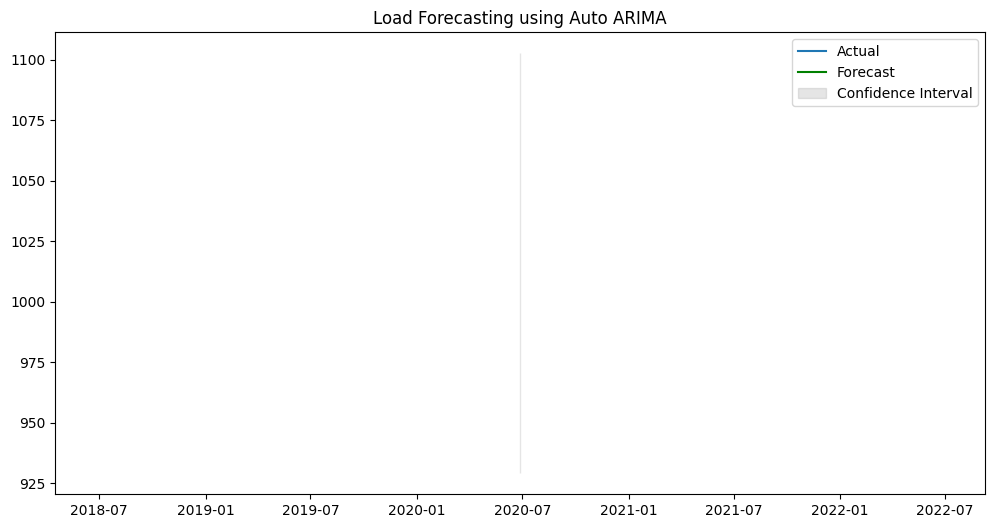

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['nat_demand'], label='Actual')
plt.plot(test_data.index, forecast, color='green', label='Forecast')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.title('Load Forecasting using Auto ARIMA')
plt.show()


In [ ]:
# ... (Previous code remains unchanged)

import time

# Lists to store forecasted values and confidence intervals
forecast_values = []
forecast_conf_intervals = []

# Make 12 predictions and store the results
for _ in range(12):
    # Fetch the latest data point
    latest_data_point = data.iloc[-1:]

    # Print the number of data points given to the ARIMA model before each prediction
    print(f"Number of data points given to ARIMA: {len(data)}")

    # Retrain the ARIMA model with the updated data
    model.fit(data['nat_demand'])

    # Make a one-step-ahead forecast
    forecast_next_hour, conf_int = model.predict(n_periods=1, return_conf_int=True, alpha=0.05)

    # Append forecasted values and confidence intervals to lists
    forecast_values.append(forecast_next_hour[0])
    forecast_conf_intervals.append(conf_int[0])

    # Get the current datetime
    current_datetime = latest_data_point.index[0]

    # Update the dataset with the forecast for the next hour
    new_data_point = pd.DataFrame({'nat_demand': forecast_next_hour}, index=[current_datetime + pd.DateOffset(minutes=1)])
    data = pd.concat([data, new_data_point])

    # Sleep for a while (adjust the duration as needed)
    time.sleep(60)  # Sleep for 1 minute between predictions

# Plot the last 12 forecasts alongside the actual data
plt.figure(figsize=(12, 6))
plt.plot(data.index[-13:], data['nat_demand'].iloc[-13:], label='Actual', color='blue')
plt.plot(data.index[-13:-1], forecast_values, color='green', label='Forecast')
plt.fill_between(data.index[-13:-1], [conf[0] for conf in forecast_conf_intervals], [conf[1] for conf in forecast_conf_intervals], color='gray', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.title('Load Forecasting using Auto ARIMA (Real-time Plot - Last 12 Forecasts)')
plt.xlabel('Date')
plt.ylabel('Demand (kW)')
plt.grid(True)
plt.show()


Number of data points given to ARIMA: 48073


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


KeyError: 0